# Human Resource Data Analysis Project
In this project Human resource data been analysed using SQL and stakehoulders' questions been answered considering basic business KPIs. Interactive dashboard been designed using Power BI to visualize the meaningful insights. 
This project is divided into four phases 1) Collect 2) Prepare 3) Analyse and 4) Visualize.  

# 1) Collect
The dataset is downloaded as a csv file from an open source website and uploaded in SQL workbench using Command Line Interface. 

# 2) Prepare 
Like other datasets, this data has also missing values, duplicates and other anomalies. Before diving into deep analysis. Data was thoroughly cleaned to find actionable insights. And, SQL is installed before interacting with database. 

%%!
pip install --trusted-host pypi.org ipython-sql

%load_ext sql

%sql sqlite://

In [ ]:
To know the structure of table 

DESCRIBE hr;

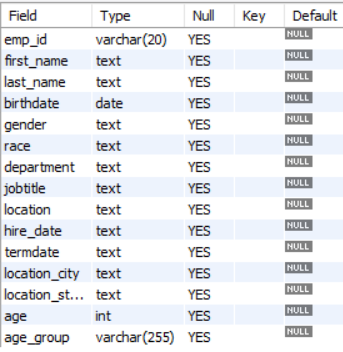

In [ ]:
To change the date of birth date formate 

UPDATE hr
SET birthdate = CASE
	WHEN birthdate LIKE '%/%' THEN date_format(str_to_date(birthdate, '%m/%d/%Y'), '%Y-%m-%d')
    WHEN birthdate LIKE '%-%' THEN date_format(str_to_date(birthdate, '%m-%d-%Y'), '%Y-%m-%d')
    ELSE NULL
END;

And, changing data type of birthdate column to "Date".

ALTER TABLE hr
MODIFY COLUMN birthdate DATE;

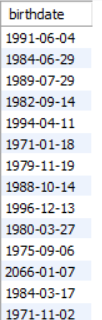

In [ ]:
Hiredate column also needs to be formated as it can be seen in raw data.

UPDATE hr
SET hire_date = CASE
	WHEN hire_date LIKE '%/%' THEN date_format(str_to_date(hire_date, '%m/%d/%Y'), '%Y-%m-%d')
    WHEN hire_date LIKE '%-%' THEN date_format(str_to_date(hire_date, '%m-%d-%Y'), '%Y-%m-%d')
    ELSE NULL
END;

And it's data type is changed to "Date".

ALTER TABLE hr
MODIFY COLUMN hire_date DATE;

## Feature Engineering

In [ ]:
Age column is required to perform analysis. So, it is derived from existing date of birth column.

ALTER TABLE hr ADD COLUMN age INT;

UPDATE hr
SET age = timestampdiff(YEAR, birthdate, CURDATE());

SELECT 
	min(age) AS youngest,
    max(age) AS oldest
FROM hr;

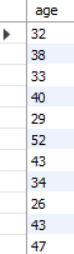

In [ ]:
To change the termdate values to date and trim time from the value of termadate column

UPDATE hr
SET termdate = date(STR_TO_DATE(termdate, '%Y-%m-%d %H:%i:%s UTC'))
WHERE termdate IS NOT NULL AND termdate != ' ';

22214 rows affected

# 3) Analyse 

In this Phase cleaned data is analysed to answer stakeholder's questions related to their business needs. Exploratory and Statistical analysis is performed to pinpoint hidden patterns and trends in the dataset.

In [ ]:
Stakeholders needs to know the gender and ethnicity breakdown in the company, that is achieved from the following query:

SELECT gender, COUNT(*) AS count
FROM hr
WHERE age >= 18
GROUP BY gender

SELECT race, COUNT(*) AS count
FROM hr
WHERE age >= 18
GROUP BY race
ORDER BY count DESC

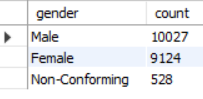

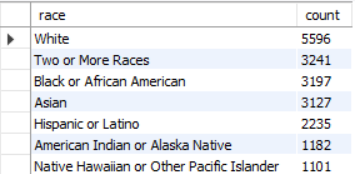

In [ ]:
Distribution of employees been find out with respect to gender and age-group

SELECT 
  CASE 
    WHEN age >= 18 AND age <= 24 THEN '18-24'
    WHEN age >= 25 AND age <= 34 THEN '25-34'
    WHEN age >= 35 AND age <= 44 THEN '35-44'
    WHEN age >= 45 AND age <= 54 THEN '45-54'
    WHEN age >= 55 AND age <= 64 THEN '55-64'
    ELSE '65+' 
  END AS age_group, 
  gender,
  COUNT(*) AS count
FROM 
  hr
WHERE 
  age >= 18
GROUP BY 
  CASE 
    WHEN age >= 18 AND age <= 24 THEN '18-24'
    WHEN age >= 25 AND age <= 34 THEN '25-34'
    WHEN age >= 35 AND age <= 44 THEN '35-44'
    WHEN age >= 45 AND age <= 54 THEN '45-54'
    WHEN age >= 55 AND age <= 64 THEN '55-64'
    ELSE '65+' 
  END, 
  gender
ORDER BY 
  age_group, 
  gender;

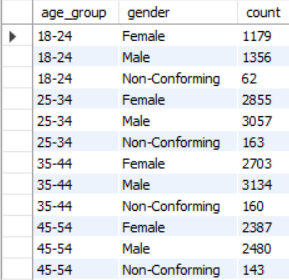

In [ ]:
Stakeholders been informed with the ratio of employees who remotely and onsite

SELECT location, COUNT(*) as count
FROM hr
WHERE age >= 18
GROUP BY location;

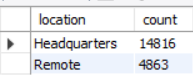

In [ ]:
To find out the Avg and Max lenght of employement in years

SELECT ROUND(AVG(DATEDIFF(termdate, hire_date))/365,0) AS avg_length_of_employment
FROM hr
WHERE termdate <> '0000-00-00' AND termdate <= CURDATE() AND age >= 18;

SELECT ROUND(Max(DATEDIFF(termdate, hire_date))/365,0) AS max_length_of_employment
FROM hr
WHERE termdate <> '0000-00-00' AND termdate <= CURDATE() AND age >= 18;

avg_length_of_employment

7

max_length_of_employment

23

In [ ]:
To find the distribution of gender across different departments

SELECT department, gender, COUNT(*) as count
FROM hr
WHERE age >= 18
GROUP BY department, gender
ORDER BY department;

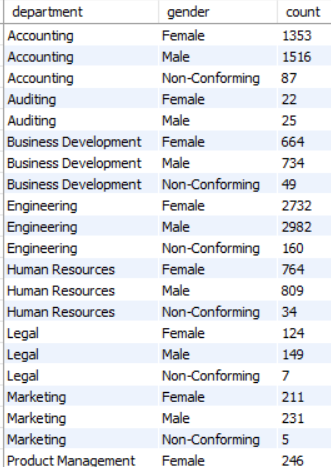

In [ ]:
Stakeholders are informed with termination rate across different departments

SELECT department, COUNT(*) as total_count, 
    SUM(CASE WHEN termdate <= CURDATE() AND termdate <> '0000-00-00' THEN 1 ELSE 0 END) as terminated_count, 
    (SUM(CASE WHEN termdate <= CURDATE() THEN 1 ELSE 0 END) / COUNT(*)) as termination_rate
FROM hr
WHERE age >= 18
GROUP BY department
ORDER BY termination_rate DESC;

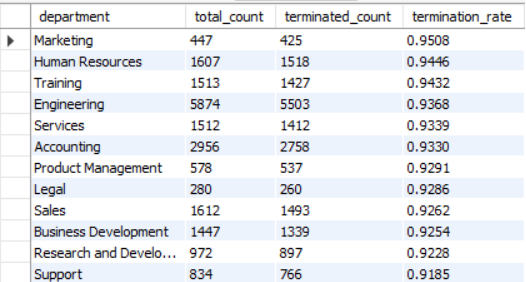

In [ ]:
To Know the distribution of employees on the map

SELECT location_state, COUNT(*) as count
FROM hr
WHERE age >= 18
GROUP BY location_state
ORDER BY count DESC;

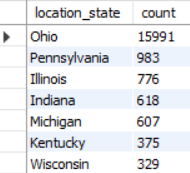

In [ ]:
Total Distribution of employee is pinpointed against each department

SELECT department, ROUND(AVG(DATEDIFF(CURDATE(), termdate)/365),0) as avg_tenure
FROM hr
WHERE termdate <= CURDATE() AND termdate <> '0000-00-00' AND age >= 18
GROUP BY department

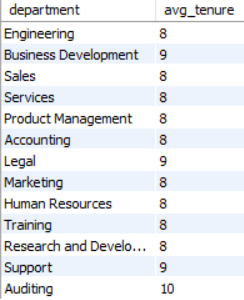

# 4) Visualize 

In this last phase data is visualized by using visulaization tool "Power BI". To make the insights easy to understandable visuals and simple language is used. 

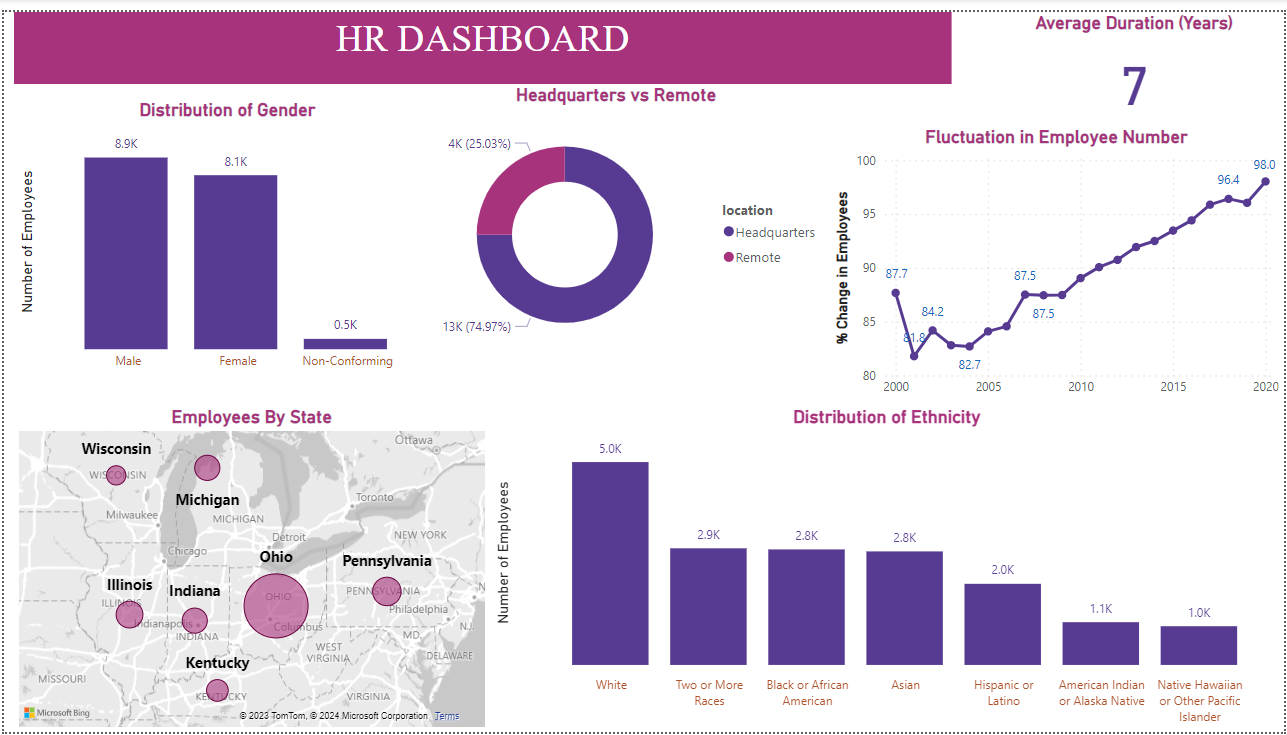

## List of Meaningful Insights
- There are more male employees
- White race is the most dominant while Native Hawaiian and American Indian are the least dominant.
- The youngest employee is 20 years old and the oldest is 57 years old
- 5 age groups were created (18-24, 25-34, 35-44, 45-54, 55-64). A large number of employees were between 25-34 followed by 35-44 while the smallest group was 55-64.
- A large number of employees work at the headquarters versus remotely.
- The average length of employment for terminated employees is around 7 years.
- The gender distribution across departments is fairly balanced but there are generally more male than female employees.
- The Marketing department has the highest turnover rate followed by Training. The least turn over rate are in the Research and development, Support and Legal departments.
- A large number of employees come from the state of Ohio.
- The net change in employees has increased over the years.
- The average tenure for each department is about 8 years with Legal and Auditing having the highest and Services, Sales and Marketing having the lowest.